### Import Libraries

In [1]:
# Data Manipulation & Analysis
import numpy as np
import pandas as pd

# Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

# Classifier Libraries 
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier 
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

# Evaluation Metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import confusion_matrix 

import warnings 
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\shopinverse\Documents\Python Datasets\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Description of features in the dataset & meanings. 

- Age : Age in years
- Sex : (1 = male; 0 = female)
- Cp - Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-angina, 4 = asymptomatic).
- trestbps - resting blood pressure (in mm Hg on addition to hospital)
- chol - serum cholesterol in mg/dl.
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - have disease or not (1 = yes; 0 = no) 

In [3]:
# Rename the features for easy understanding and readability 
df.columns = ['age', 'sex', 'chest_paintype', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df

,age,sex,chest_paintype,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Data verification - Data type, number of features & rows, missing data etc. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_paintype           303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [5]:
# Statistical Analysis of the data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_paintype,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_heart_rate_achieved,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exercise_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
# Check for missing values 
print(df.isnull().sum())

age                        0
sex                        0
chest_paintype             0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


The dataset is now clean and void of any missing or incomplete data

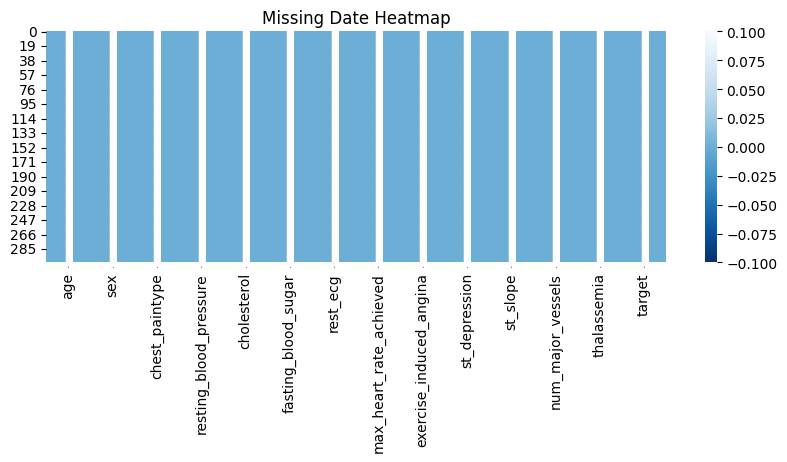

In [7]:
# Visualize the missing data 
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), annot=True, cmap='Blues_r')
plt.title('Missing Date Heatmap')
plt.show();

The viz above is the heatmap showing no missing data

### Begin Exploratory Data Analysis 

##### Univariate Data Analysis 

In [8]:
df.columns

Index(['age', 'sex', 'chest_paintype', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

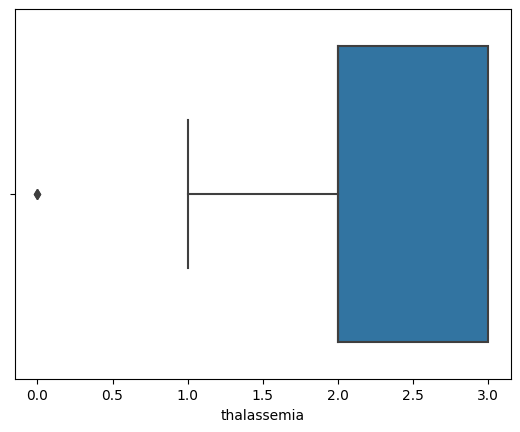

In [9]:
# Check for Outliers in some of the features 
sns.boxplot(x=df['thalassemia']);

There is an outlier in the feature above. 

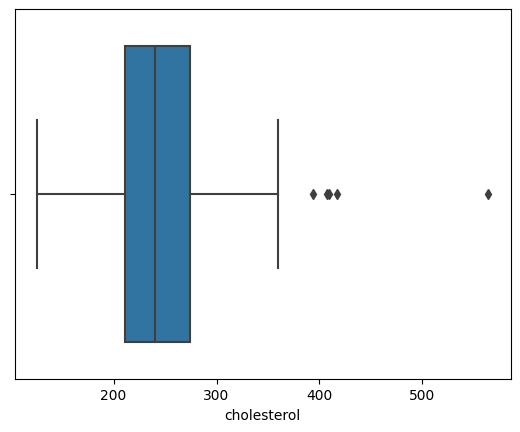

In [10]:
# Check for Outliers in some of the features 
sns.boxplot(x=df['cholesterol']);

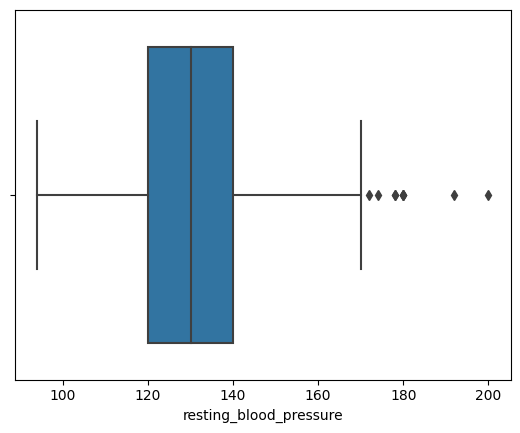

In [11]:
# Check for Outliers in some of the features 
sns.boxplot(x=df['resting_blood_pressure']);

There are outliers in the feature above 

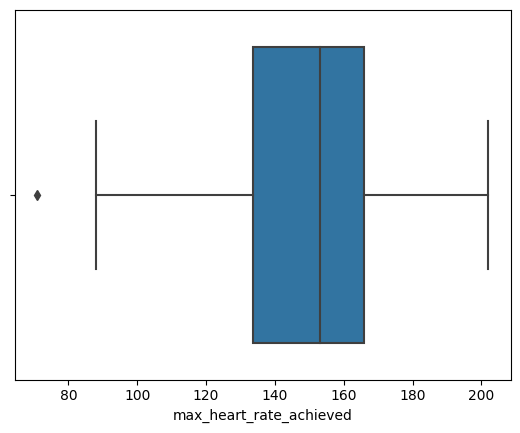

In [12]:
# Check for Outliers in some of the features 
sns.boxplot(x=df['max_heart_rate_achieved']);

There is an outlier in the feature above. 

Since I have noticed outliers in some features in the dataset, I'll have to perform normalization and/or standardization to normalize the dataset before proceeding to train the model.

In [13]:
# Grouping Patients into Age Bracket 
def age_bracket(age):
    if age <= 35:
        return 'Youth(<=35)'
    elif age <= 55:
        return 'Adult(<=55)'
    elif age <= 65:
        return 'Old Adult(<=65)'
    else:
        return 'Elder(>65)'

df['age_bracket'] = df['age'].apply(age_bracket)

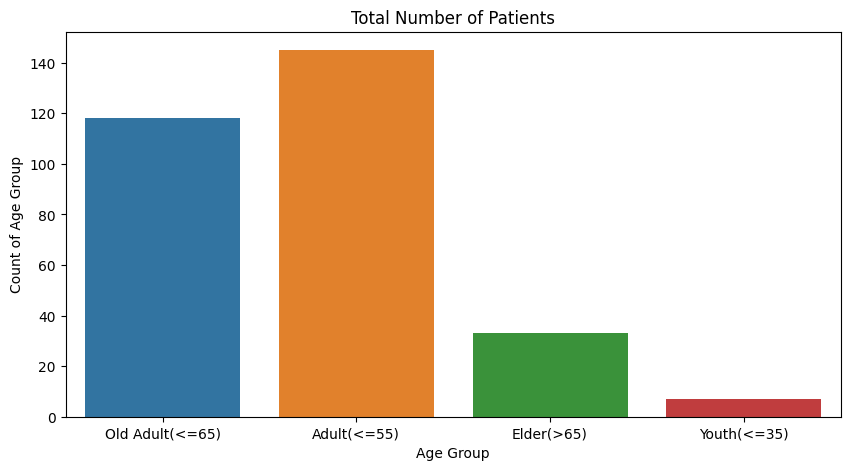

In [14]:
# Visualizing the age bracket of patients in the dataset 
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')
plt.show();

From the viz, the paients in the above 55 years age-group (Adults) are more in number than any other age-group while the youths are least in number in the dataset

In [15]:
# Grouping the Genders 
def gender(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'

df['gender'] = df['sex'].apply(gender)

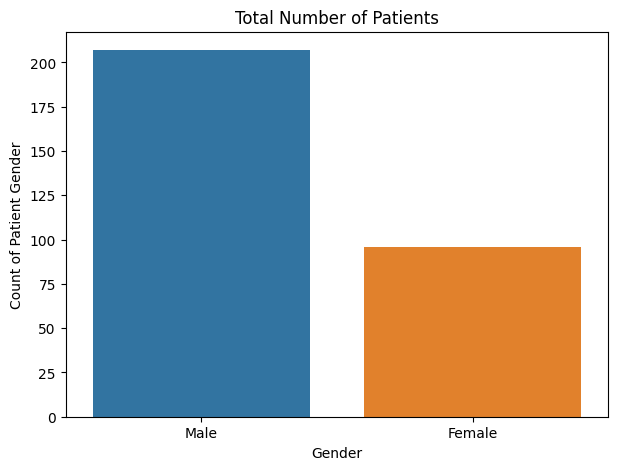

In [16]:
# Visualizing the Gender feature in the dataset 
plt.figure(figsize=(7,5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of Patient Gender')
plt.title('Total Number of Patients')
plt.show();

Male patients are twice as more than their female counterpart. 

In [17]:
# Visualizing Chest pain types 
# 1. typical angina, 2. atypical angina, 3. non-angina, 4. asymptomatic 
def chest_pain(cp):
    if cp == 1:
        return 'typical angina'
    elif cp == 2:
        return 'atypical angina'
    elif cp == 3:
        return 'non-angina'
    else:
        return 'asymptomatic'

df['cp_cat'] = df['chest_paintype'].apply(chest_pain)

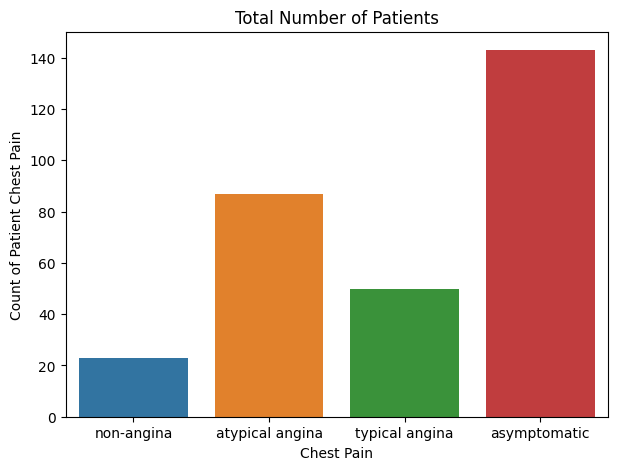

In [18]:
# Visualizing the Chest pain feature in the dataset 
plt.figure(figsize=(7,5))
sns.countplot(x='cp_cat', data=df)
plt.xlabel('Chest Pain')
plt.ylabel('Count of Patient Chest Pain')
plt.title('Total Number of Patients')
plt.show();

Patients with asymptomatic chest paint type had the most count while non-angina patients had the least count in the dataset. 

In [19]:
#Visualizing patients with or without heart disease (1=yes, 0=no)

def label(tg):
    if tg == 1:
        return 'Yes'
    else:
        return 'No'

df['label'] = df['target'].apply(label)

# Printing total patients in each category 
print(df['label'].value_counts())

label
Yes    165
No     138
Name: count, dtype: int64


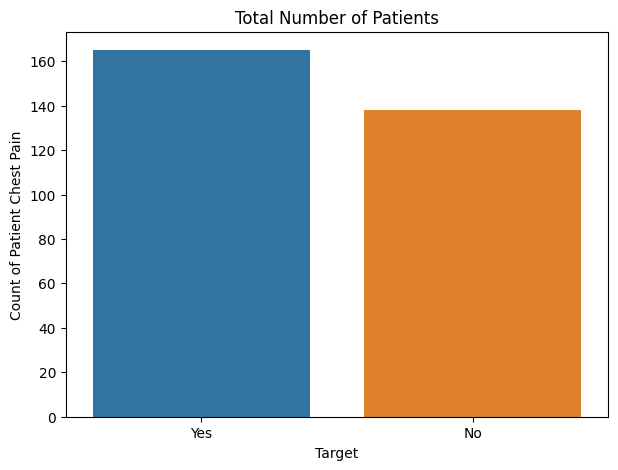

In [20]:
# Visualizing above data of patients with or without heart disease.
plt.figure(figsize=(7,5))
sns.countplot(x='label', data=df)
plt.xlabel('Target')
plt.ylabel('Count of Patient Chest Pain')
plt.title('Total Number of Patients')
plt.show();

From the Viz above, there are 165 patients with heart disease while there are 138 patients with no heart disease. 

##### Bivariate Data Analysis

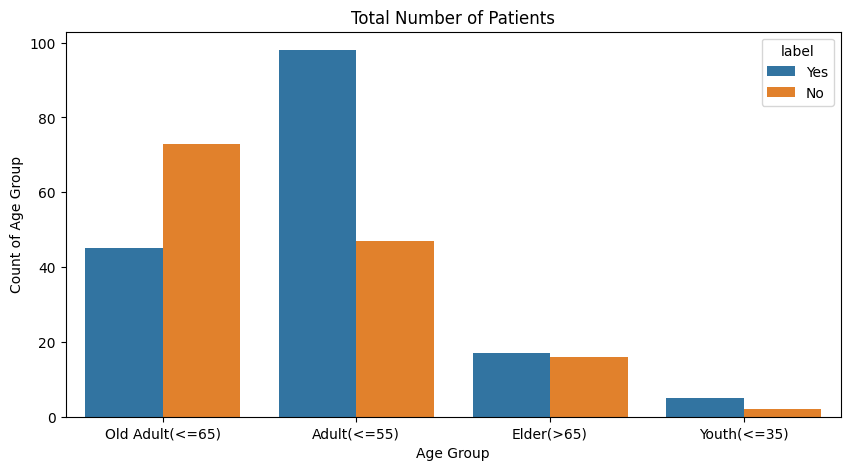

In [21]:
# Investigating the age group of patients by the target variable.
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')
plt.show();

There are more patients with heart disease in the Adult(<=55) age group numbering about 98 compared to other age groups followed by the Old Adults(<=65) age group numbering slightly over 40 patients. 

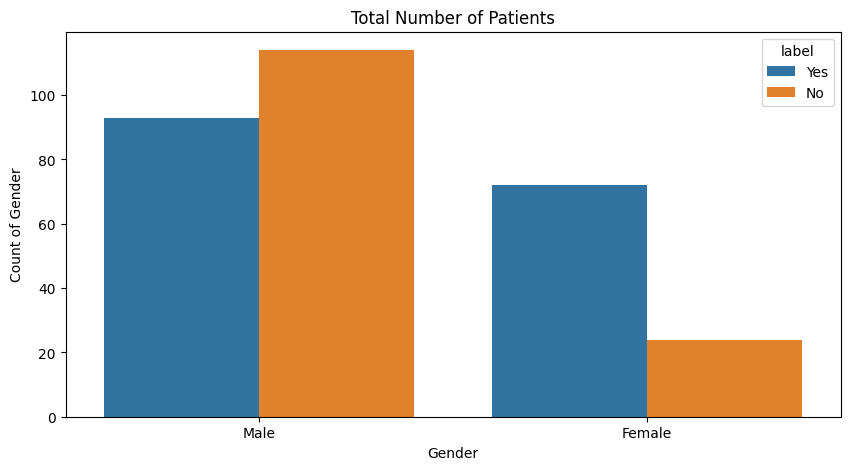

In [22]:
# Investigating the gender of patients by the target variable.
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Total Number of Patients')
plt.show();

Fewer men had heart diseases while more women had a case of heart disease in their specific categories. Generally, men had more cases of heart diseases than women. 

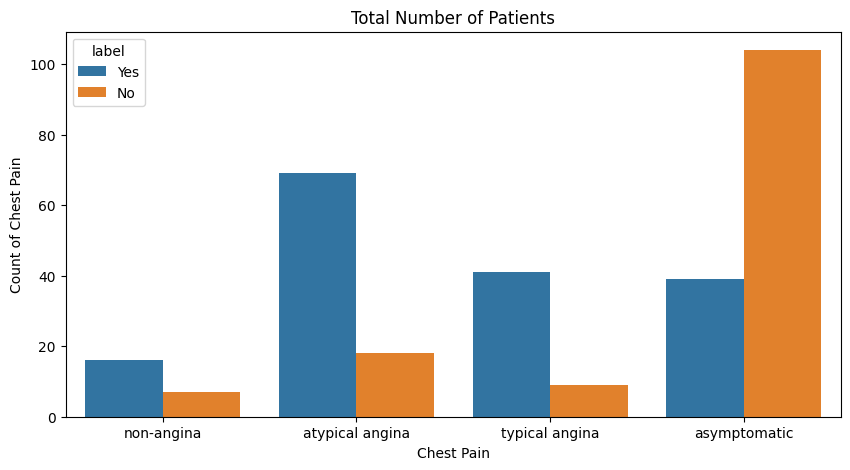

In [23]:
# Investigating the Chest Pain of patients by the target variable.
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat', data=df, hue='label')
plt.xlabel('Chest Pain')
plt.ylabel('Count of Chest Pain')
plt.title('Total Number of Patients')
plt.show();

In the viz above, patients with chest pain type atypical angina had the highest number of heart diseases followed by patients in the typical angina group while patients in the non-angina group had the least cases of patients with heart diseases. Similarly, patients in the asymptomatic group recorded the highest patients with no-related heart diseases while patients in the non-angina group recorded the least. 

##### Multivariate Data Analysis

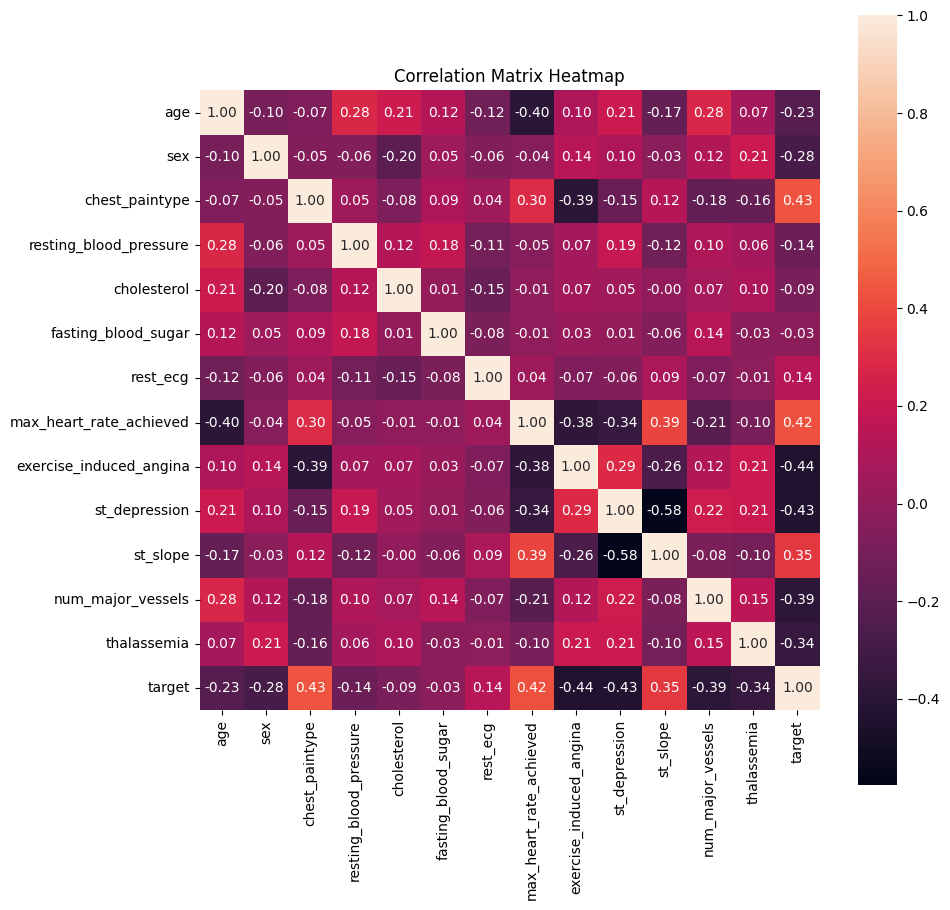

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

# Drop non-numeric columns or convert them if needed
df_numeric = df.drop(columns=non_numeric_cols)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Set up the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Matrix Heatmap')
plt.show()


The heatmap visual shows the correlation between the target variable (patients with and without cases of heart disease) and other features. The objective here is to determine the features which have a linear relationship with the target feature. Specifically, the features which have relationship with the target variable and their degree of relationships. 

Reviewing the heatmap, reveals a positive relationship between the target feature and chest pain type, maximum heart rate reached and ST Slope which means high prevalence of these features in a patient can lead to heart disease. While other features like exercised induced angina, st_depression, number of major vessels and thalassemia have a strong negative relationship with the target feature meaning low prevelance of these features in a patient can not lead to heart disease. 

### Data Pre-processing & Feature Engineering 

In [25]:
df.columns 

Index(['age', 'sex', 'chest_paintype', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target', 'age_bracket', 'gender',
       'cp_cat', 'label'],
      dtype='object')

In [26]:
# Select only features with numerics to enable us train the model. Drop-off categorical columns used for earlier visualization.
df1=df[['age', 'sex', 'chest_paintype', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']]
df1.head()

,age,sex,chest_paintype,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
# Assign the target feature to the variable label 
label=df[['target']]

In [28]:
# Check for only datatypes float and integers in the dataset.
df1.dtypes

age                          int64
sex                          int64
chest_paintype               int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [29]:
# Work on outliers by either normalizing or standardizing the features with outliers in the dataset.
''' Assign the MinMaxScaler function to the variable scaler '''
scaler=MinMaxScaler()

''' Reshape each feature with outlier using the scaler-fit-transform function and assigned to new features'''
df1['Scaled_RBP']=scaler.fit_transform(df1[['resting_blood_pressure']].values.reshape(-1,1))
df1['Scaled_chol']=scaler.fit_transform(df1[['cholesterol']].values.reshape(-1,1))
df1['Scaled_thal']=scaler.fit_transform(df1[['thalassemia']].values.reshape(-1,1))
df1['Scaled_max_heart_rate_achieved']=scaler.fit_transform(df1[['max_heart_rate_achieved']].values.reshape(-1,1))

''' Drop-off the features with categorical information used for earlier vizes '''
df1.drop(['resting_blood_pressure', 'thalassemia', 'cholesterol', 'max_heart_rate_achieved'], axis=1, inplace=True)

df1.head()


,age,sex,chest_paintype,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate_achieved
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


##### Machine Learning

In [30]:
# Split the dataset into both training and test datasets. 
x_train, x_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42) 

In [31]:
# Shape of the dataset 
df1.shape

(303, 13)

In [32]:
# Shape of the target feature 
label.shape

(303, 1)

In [33]:
x_train.head(3)

,age,sex,chest_paintype,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate_achieved
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153


In [34]:
y_train.head(3)

,target
132,1
202,0
196,0


In [35]:
label

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [36]:
x_test.head(3)

,age,sex,chest_paintype,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate_achieved
179,57,1,0,0,0,1,0.6,1,1,0.528302,0.342466,0.333333,0.312977
228,59,1,3,0,0,0,0.2,1,0,0.716981,0.369863,1.000000,0.671756
111,57,1,2,1,1,0,0.2,2,1,0.528302,0.000000,1.000000,0.778626


In [37]:
y_test.head(3)

,target
179,0
228,0
111,1


##### Building the Models 

In [38]:
# Building a Logistic Regression Model
logreg=LogisticRegression()
logreg.fit(x_train, y_train)
ly_pred=logreg.predict(x_test)

print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-Score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression Model
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1-Score: 0.875
AUC-ROC: 0.8685344827586206


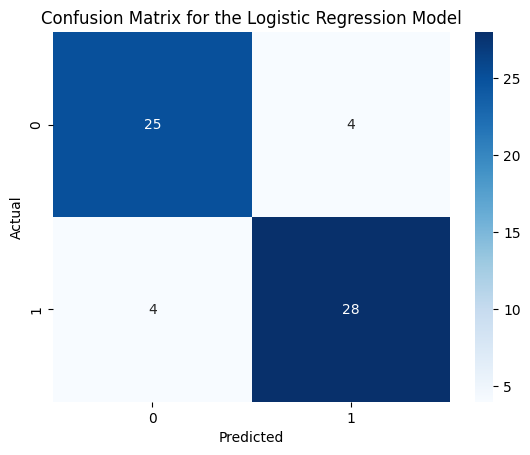

In [39]:
# Building a Confusion Matrix for Logistic Regression Model
lcm=confusion_matrix(y_test, ly_pred)

#Visualize the Confusion Matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Logistic Regression Model')
plt.show();


In [40]:
# Building a Random Forest Classifier Model
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred=rfc.predict(x_test)

print("Random Forest Model")
print("Accuracy:", accuracy_score(y_test, rfc_pred))
print("Precision:", precision_score(y_test, rfc_pred))
print("Recall:", recall_score(y_test, rfc_pred))
print("F1-Score:", f1_score(y_test, rfc_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfc_pred))

Random Forest Model
Accuracy: 0.8688524590163934
Precision: 0.8529411764705882
Recall: 0.90625
F1-Score: 0.8787878787878787
AUC-ROC: 0.8669181034482758


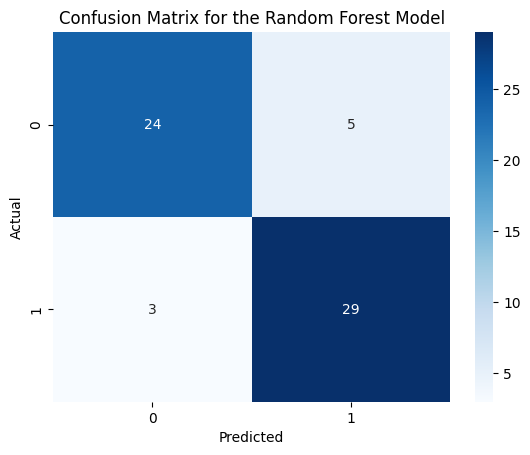

In [41]:
# Building a Confusion Matrix for the Random Forest Classifier 
rcm=confusion_matrix(y_test, rfc_pred)

#Visualize the Confusion Matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Random Forest Model')
plt.show();

##### Build & apply all the models at once to determine the best fit

In [42]:
# Build 8 Machine Learning Models for the dataset.
classifiers = [
    [XGBClassifier(), 'XGBClassifier'],
    [RandomForestClassifier(), 'Random Forest'],
    [KNeighborsClassifier(), 'K-Nearest Neighbours'],
    [SGDClassifier(), 'SGD Classifier'],
    [SVC(), 'SVC'],
    [GaussianNB(), 'Naive Bayes'],
    [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
    [LogisticRegression(), 'Logistic Regression']
]

In [43]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...),
  'XGBClassifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassif

In [44]:
# Applying 8 Machine Learning Models to the dataset.
acc_list = {}
precision_list={}
recall_list={}
roc_list={}
con_matrix={}

for classifier in classifiers:
    model=classifier[0]
    model.fit(x_train, y_train)
    model_name=classifier[1]

    pred=model.predict(x_test)

    # Assigning the algorithm to the metrics 
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    con_score = confusion_matrix(y_test, pred)

    # Converting the metrics into percentatges
    acc_list[model_name]=([str(round(a_score*100,2)) + '%'])
    precision_list[model_name]=([str(round(p_score*100,2)) + '%'])
    recall_list[model_name]=([str(round(r_score*100,2)) + '%'])
    roc_list[model_name]=([str(round(roc_score*100,2)) + '%'])

    if model_name != classifiers[-1][1]:
        print(" ")

In [45]:
# Checking the dictionary 
acc_list

{'XGBClassifier': ['83.61%'],
 'Random Forest': ['83.61%'],
 'K-Nearest Neighbours': ['75.41%'],
 'SGD Classifier': ['67.21%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Decision Tree': ['85.25%'],
 'Logistic Regression': ['86.89%']}

In [46]:
# Outputting the Accuracy Score in a table format 
print("Accuracy Score")
s1=pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGBClassifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,83.61%,83.61%,75.41%,67.21%,65.57%,86.89%,85.25%,86.89%


In [47]:
# Outputting the Precision Score in a table format 
print("Precision Score")
s2=pd.DataFrame(precision_list)
s2.head()

Precision Score


,XGBClassifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,86.67%,84.38%,79.31%,62.0%,65.71%,90.0%,92.59%,87.5%


In [48]:
# Outputting the Recall Score in a table format 
print("Recall Score")
s3=pd.DataFrame(recall_list)
s3.head()

Recall Score


,XGBClassifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.25%,84.38%,71.88%,96.88%,71.88%,84.38%,78.12%,87.5%


In [49]:
# Outputting the ROC Score in a table format 
print("ROC Score")
s4=pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGBClassifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,83.73%,83.57%,75.59%,65.68%,65.25%,87.02%,85.61%,86.85%


In [50]:
# Outputting the Confusion Matrix in a table format 
print("Confusion Matrix")
s5=pd.DataFrame(con_score)
s5.head()

Confusion Matrix


,0,1
0,25,4
1,4,28


In Sumamary, I'm recommending the SGD Classifier model becuase it recorded the best performance metrics - Accuracy (89%), Precision (88%), Recall(91%), RoC (88%)